In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.data', header=None)
#print(data.head())

In [17]:
# Get names of indexes for which column Stock has value No
indexNames = data[ data[4] == 'Iris-versicolor' ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data=data.replace({"Iris-setosa": 0, "Iris-virginica": 1})
#print(data.head())

In [18]:
x1mm,x2mm=data[0].min(),data[1].min()
x1mx,x2mx=data[0].max(),data[1].max()
x1=(data[0]-x1mm)/(x1mx-x1mm)
x2=(data[1]-x2mm)/(x2mx-x2mm)
y1 = data[4]

class_0 = data[ data[4] == 0 ].index 
class_1 = data[ data[4] == 1 ].index

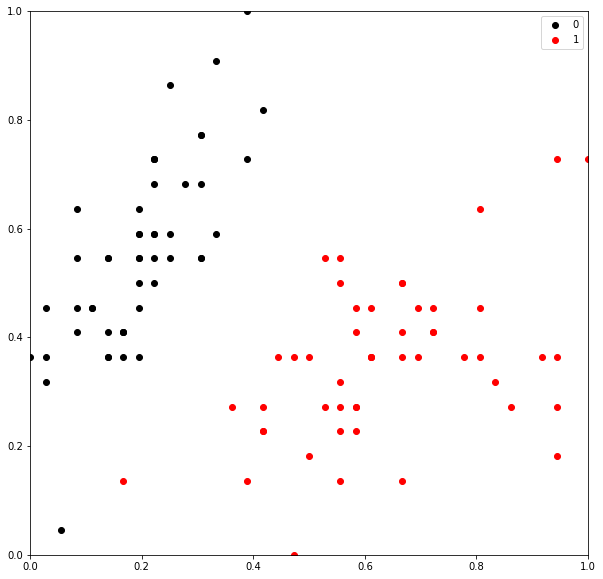

In [19]:
fig = plt.figure(figsize=(10,10))
plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

#Solución con el metodo que vimos en clase

Epoch [1/15], bias: 0.0, w1: 0.16666666666666669, w2: -0.045454545454545525


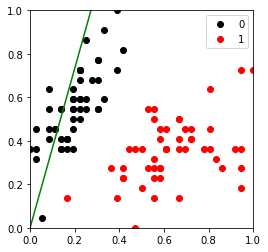

Epoch [2/15], bias: 0.0, w1: 0.33333333333333337, w2: -0.09090909090909105


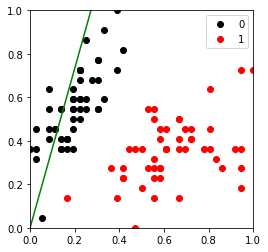

Epoch [3/15], bias: 0.0, w1: 0.5, w2: -0.13636363636363658


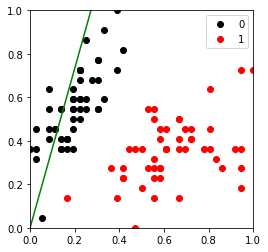

Epoch [4/15], bias: 0.0, w1: 0.6666666666666667, w2: -0.1818181818181821


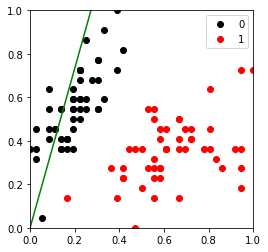

Epoch [5/15], bias: 0.0, w1: 0.8333333333333335, w2: -0.22727272727272763


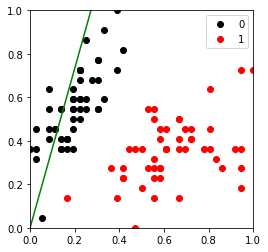

Epoch [6/15], bias: 0.0, w1: 1.0000000000000002, w2: -0.27272727272727315


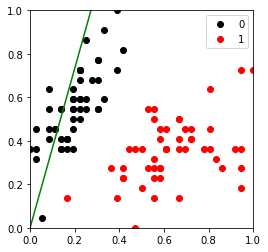

Epoch [7/15], bias: 0.0, w1: 1.166666666666667, w2: -0.3181818181818187


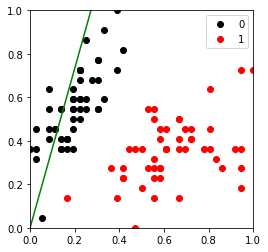

Epoch [8/15], bias: 0.0, w1: 1.3333333333333335, w2: -0.3636363636363642


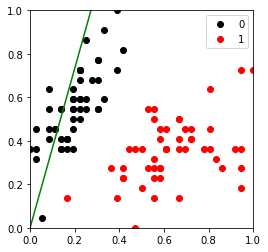

Epoch [9/15], bias: 0.0, w1: 1.5, w2: -0.4090909090909097


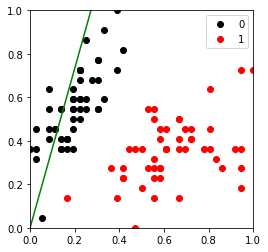

Epoch [10/15], bias: 0.0, w1: 1.6666666666666665, w2: -0.45454545454545525


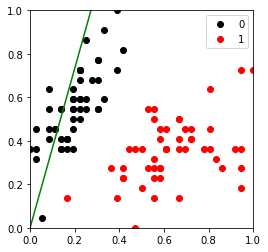

Epoch [11/15], bias: 0.0, w1: 1.833333333333333, w2: -0.5000000000000008


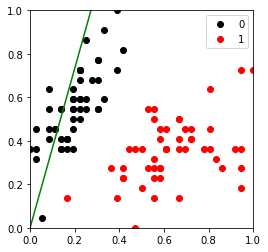

Epoch [12/15], bias: 0.0, w1: 1.8055555555555554, w2: -0.7272727272727281


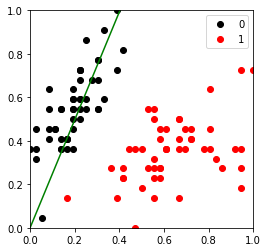

Epoch [13/15], bias: 0.0, w1: 1.8055555555555554, w2: -0.8409090909090917


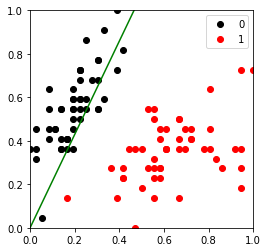

Epoch [14/15], bias: 0.0, w1: 1.8749999999999998, w2: -1.0000000000000009


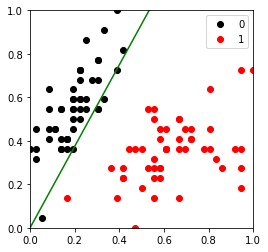

Epoch [15/15], bias: 0.0, w1: 1.958333333333333, w2: -1.1136363636363646


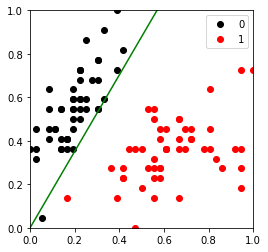

In [20]:
def y(x):
    return -(b + w_1*x)/w_2
def act(z):
    return 1/(1 + np.exp(-z))
#-- Definimos el Perceptron
# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
    for i,j,k in zip(x1,x2,y1):
    
        # Función de Suma
        z = i*w_1 + j*w_2 + b

        # Función de Activación
        sig_z = act(z)

        # Evaluamos la salida (output)
        if sig_z >= 0.5:
            out = 1
        if sig_z < 0.5:
            out = 0

        # Calculamos el error
        error = k - out

        # Actualizamos los pesos
        b = b + n*error
        w_1 += n*error*i
        w_2 += n*error*j

    print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

    fig = plt.figure(figsize=(4,4))
    plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
    plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')
    plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green',)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.show()

#Solución usando un Perceptron de Sklearn

In [21]:
X=pd.concat([x1, x2], axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y1)

In [23]:
perceptron=Perceptron(tol=1e-4)
perceptron.fit(x_train,y_train)
print(perceptron.predict(x_test)-y_test)

40     0
104    0
25     0
139    0
22     0
116    0
13     0
147    0
106    0
102    0
130    0
145    0
148    0
19     0
42     0
127    0
110    0
119    0
28     0
31     0
132    0
10     0
41     1
141    0
140    0
Name: 4, dtype: int64


In [24]:
perceptron.score(x_test,y_test)

0.96

#Solución usando MLP

In [26]:
data = pd.read_csv('iris.data', header=None)
data = data.replace({"Iris-setosa": 0, 'Iris-versicolor':1, "Iris-virginica": 2})
y = data[4]
X = data.drop([4], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [39]:
model1 = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2), solver='adam', learning_rate_init=0.1)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.23684210526315788

In [47]:
model2 = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2, 2), solver='adam', learning_rate_init=0.1)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.34210526315789475